<a href="https://colab.research.google.com/github/vijayc9/Mall-Customer-Segmentation-K-Means/blob/main/customer_segmentation_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [23]:
# read the csv file from the path
path = "/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"
df = pd.read_csv(path)

In [24]:
# display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.shape

(200, 5)

In [26]:
# Droping unnecessary feature
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Univariate Analysis

In [28]:
# check the descriptive analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

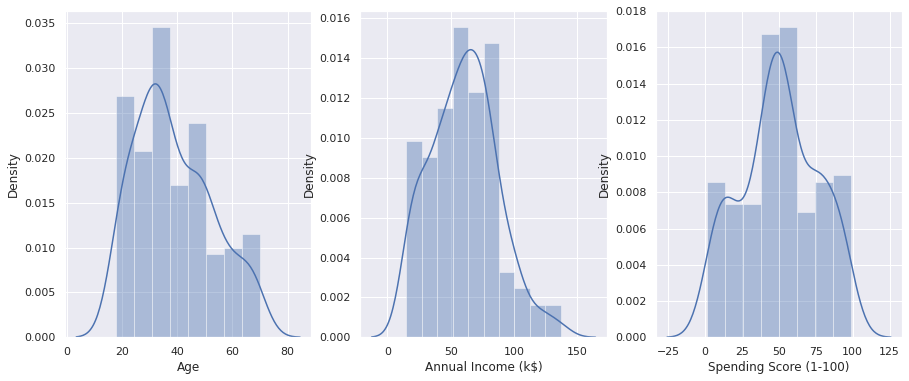

In [8]:
# checking for the numerical variables

col = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
    
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.distplot(df[i] , ax=ax)

plt.show();

We see that:
1. There is steep rise but gradual decrease in age. This means that we have more younger and mid age people.
2. The annual income shows most people have salares less than 100 k per annum.
3. The spending score is sort of normally distributed with mean around 50 k

In [9]:
# percentage of male and female in our data
df["Gender"].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

From above:
1. There are 56% of female and 44% of male in data

<Figure size 432x288 with 0 Axes>

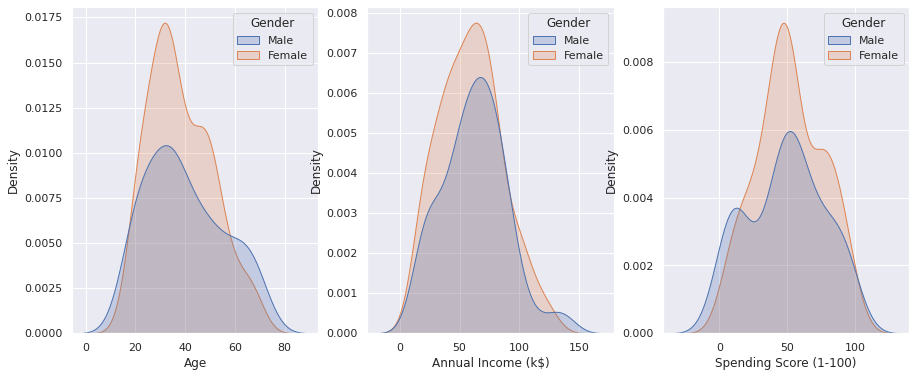

In [10]:
# Ploting the distribution of different gender behaviour
fig=plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (15,6))
for i, ax in zip(col, axes.flat):
    sns.kdeplot(df[i],shade = True, hue = df["Gender"] , ax=ax)

plt.show();

From above:
1. Females of year from 30-40 years are predominantly present in data
2. The females costomers have better annual income compared to male costomers
3. The spending score of Female is better than Male.

<Figure size 1080x432 with 0 Axes>

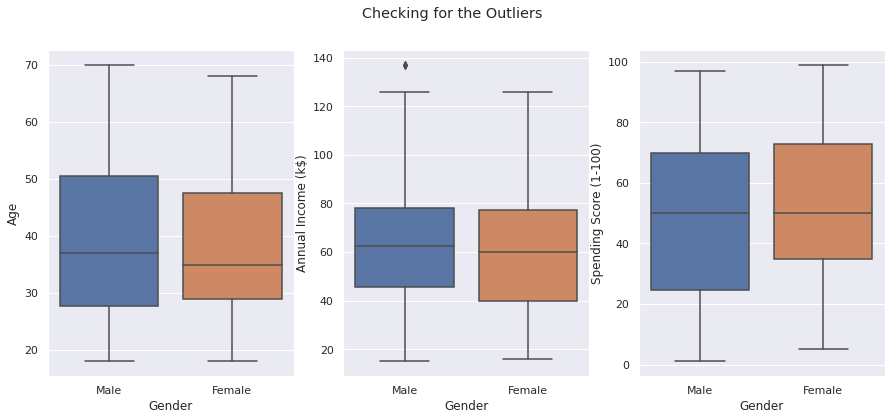

In [27]:
# checking for outliers
plt.rc('figure', figsize=(15, 6))  
fig=plt.figure()
fig , axes = plt.subplots(ncols = 3, nrows = 1)
for i, ax in zip (col, axes.flat):
    sns.boxplot( data = df, x = "Gender", y = df[i], ax = ax)
fig.suptitle('Checking for the Outliers')
plt.show();


From above:
1. Starting age of male amd female is nearly same.
2. The median age of male is greater than female
3. Younger women are more predominant 
4. female start shopping from less income range compared to male
5. Male shoppers has outliers when compared as per their income
6. Median annual income of male is slightly more than female
7. Spending score of female is higher than male
8. Median of spending score of male and female is nearly same

# Bivariate Analysis

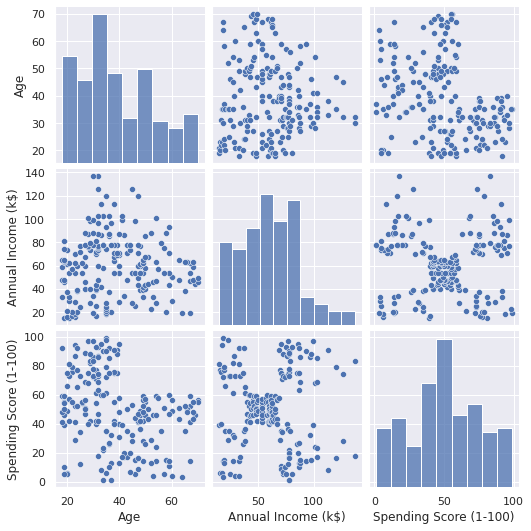

In [29]:
# checking the relationship between the different pairs of variables 
sns.pairplot(df)

We see that there is a nice cluster between the pair plot of Annual Income and spending score

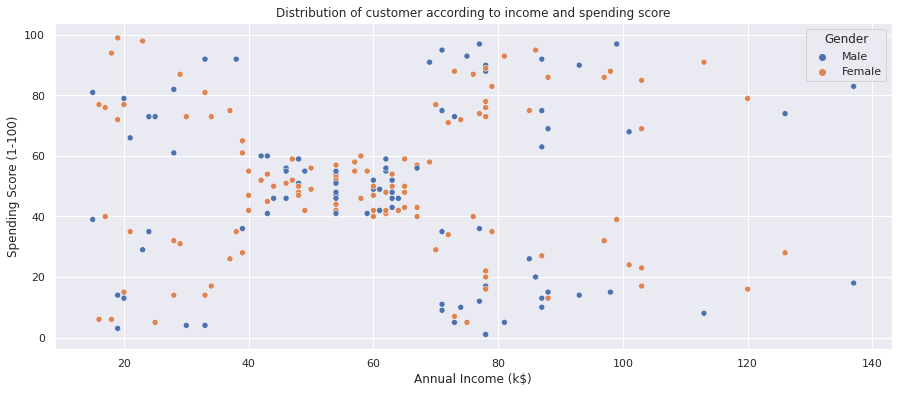

In [ ]:
# let us check the spending score as per the annual income
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")
plt.title("Distribution of customer according to income and spending score");

From above:
1. We can see 5 clusters in the plot above. 
2. The desired cluster is high income and high spending score
3. Men and women behave somewhat similarly 

In [30]:
# checking the statistic as per the gender
df.groupby("Gender").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


From above:
1. The mean age of male and female is nearly same
2. Average annual income of male is more than female
3. However, the mean of spending score of female is more than male

In [31]:
# checking the correlation between features
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

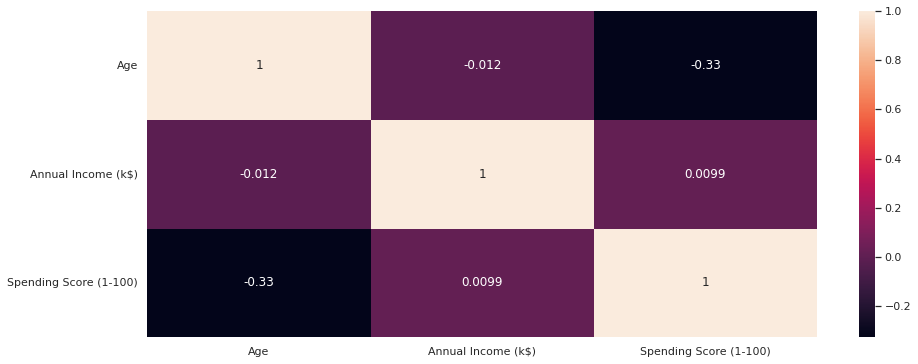

In [ ]:
# Creating the heatmap
sns.heatmap(df.corr(), annot = True)

From above:
1. The Age has negative correlation with spending score and income.
2. This means that older people spends less
3. The annual income decrease with the increase in age
4. The only positive correlation is between annual income and spending score.
5. However the value is still small.

#K-Means for grouping the customers

In [32]:
# Bivariate Analysis
# finding the optimal value of inertia for determining the optimal number of clusters
inertia_scores_bi = []
for i in range(1, 11):
    cluster_bi = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_bi.fit( df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores_bi.append(cluster_bi.inertia_)

Text(0.5, 1.0, 'Checking the optimal number of clusters')

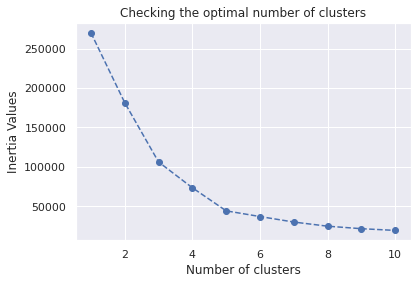

In [45]:
#Plot the elbow graph for optimal k 
plt.plot(range(1, 11), inertia_scores_bi, 'bo--')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Values")
plt.title("Checking the optimal number of clusters")

**Within-cluster-sum-of-square(WCSS)/Loss/Inertia** measures how well a dataset was clustered by K-Means. It is calculated by measuring the sum of square of the distance of each point from it's nearest centroid. The low the value of inertia the compact is the cluster, and that is what we want.

In the **elbow method**, we plot the inertia value for each k and look for the elbow point where the rate of decrease shifts. This elbow point can be used to determine the optimal K. However, if the data is not clustered then this method may not work well.

As per the elbow method the **optimal k** value is **5**

In [46]:
# fitting the bivariate model
cluster_bi = KMeans(n_clusters = 5)
cluster_bi.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

# creating the cluster column
df["Income Cluster_bi"] = cluster_bi.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster_bi
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


In [47]:
# finding the center of the clusters 
centers = pd.DataFrame(cluster_bi.cluster_centers_)
centers.columns = ["x", "y"]

Text(0.5, 1.0, 'Clusters with the centroid')

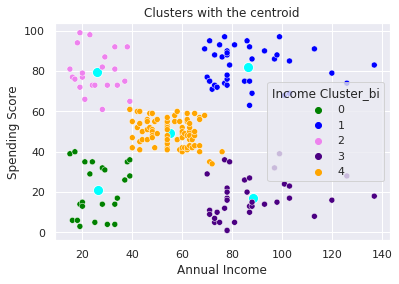

In [72]:
# clusters with the centroid 
fig, ax = plt.subplots(1,1)
ax = sns.scatterplot(data = df, x = centers["x"], y = centers["y"], color = "cyan", s = 100)
colors=['green', 'blue', 'violet', 'indigo', 'orange']
ax = sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)",palette=colors, hue='Income Cluster_bi')

ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
plt.title("Clusters with the centroid")

In [69]:
# checking mean as per bivariate
df.groupby("Income Cluster_bi").mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster_bi,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


From above:
1. There are 5 clusters
2. The cluster 1 is high income and high spending group.
3. Cluster 0 is not a favourable group as it is low income and low spending group.
4. Cluster 2 is low income high Spending group and it consists of mainly younger people of mean age 25.
5. Younger people tends to spend more than older people, so focus should be done on older people
6. Focus on cluster 3 must be done as they have high annual income but low spending score

In [73]:
pd.crosstab(df["Income Cluster_bi"], df["Gender"], normalize = "index")

Gender,Female,Male
Income Cluster_bi,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.592593,0.407407


Here Women and men equaly distributed over variour cluster, except for cluster 0, which is low income and low spending group, so no need to focus men and women group separately.